#  IDEA LAB 8th Weekly Seminar Conference Code File
## Relu
### Writer: Su-Yeon Kang 
2022.08.22

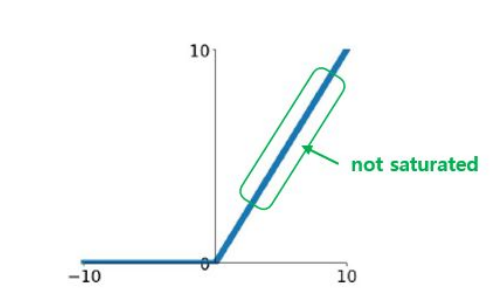
### 렐루 함수를 은닉층에서 많이 사용하는 이유
 

<b>- 기울기 소실(Vanishing Gradient) 문제가 발생하지 않는다.</b>


렐루 함수는 양수는 그대로, 음수는 0으로 반환하는데, 그러다 보니 특정 양수 값에 수렴하지 않는다. 


즉, 출력값의 범위가 넓고, 양수인 경우 자기 자신을 그대로 반환하기 때문에, 심층 신경망인 딥러닝에서 시그모이드 함수를 활성화 함수로 사용해 발생한 문제였던 <b> 기울기 소실(Vanishing Gradient) 문제</b>가 발생하지 않는다.
 

<b>- 기존 활성화 함수에 비해 속도가 매우 빠르다 </b>


동시에 렐루 함수의 공식은 음수면 0, 양수면 자기 자신을 반환하는 아주 단순한 공식이다 보니, 경사 하강 시 다른 활성화 함수에 비해 학습 속도가 매우 빠르다!
확률적 경사하강법(SGD)을 쓴다고 할 때, 시그모이드 함수나 하이퍼볼릭 탄젠트 함수에 비해 수렴하는 속도가 약 6배 가까이 빠르다고 한다!
ReLU가 나오기 전에는 활성화 함수가 부드러워야(Smooth) 가중치 업데이트가 잘된다고 생각하여 exp 연산이 들어간 시그모이드나, 하이퍼볼릭 탄젠트 함수를 사용하여쓰나, 활성화 함수가 부드러운(Smooth)한 구간에 도달하는 순간 가중치 업데이트 속도가 매우 느려진다.
ReLU는 편미분(기울기) 시 1로 일정하므로, 가중치 업데이트 속도가 매우 빠르다.
 

 

 

 

### 렐루 함수의 한계점
렐루 함수의 그래프를 보면, 음수 값이 들어오는 경우 모두 0으로 반환하는 문제가 있다보니, 입력값이 음수인 경우 기울기도 모조리 0으로 나오게 된다.


입력값이 음수인 경우에 한정되긴 하지만, 기울기가 0이 되어 가중치 업데이트가 안되는 현상이 발생할 수 있다.


즉, <b>가중치가 업데이트 되는 과정에서 가중치 합이 음수가 되는 순간 ReLU는 0을 반환하기 때문에 해당 뉴런은 그 이후로 0만 반환하는 아무것도 변하지 않는 현상</b>이 발생할 수 있다.
이러한 죽은 뉴런(Dead Neuron)을 초래하는 현상을 죽어가는 <b>렐루(Dying ReLU) 현상</b>이라고 한다.


또한 렐루 함수는 기울기 소실 문제 방지를 위해 사용하는 활성화 함수이기 때문에 은닉층에서만 사용하는 것을 추천한다.


ReLU의 출력값은 0 또는 양수이며, ReLU의 기울기도 0 또는 1이므로, 둘 다 양수이다. 이로 인해 시그모이드 함수처럼 가중치 업데이트 시 지그제그로 최적의 가중치를 찾아가는 지그재그 현상이 발생한다.


또, ReLU의 미분은 0 초과 시, 1 0은 0으로 끊긴다는 문제가 있다. 즉, ReLU는 0에서 미분이 불가능하다.


(이에 대해 활성화 함수로는 미분 불가능 하다할지라도, 출력값 문제는 아니고, 0에 걸릴 확률이 적으니, 이를 무시하고 사용한다.)
 

 

 

 지금까지 은닉층에서 주로 사용되는 활성화 함수인 렐루 함수에 대해 학습해보았다. 비록 렐루 함수가 입력값이 0일 때, 기울기가 0에 수렴해 가중치 업데이트가 안 되는 현상이 발생한다고는 하지만, 성능상 큰 문제가 없으며, 도리어 이를 해결하기 위해 만든 활성화 함수의 성능이 보다 안 나오는 경우도 있다고 한다.

 때문에 기본적으로 은닉층에서는 렐루 함수를 사용하지만, 때에 따라 렐루 함수의 단점이 두드러지는 경우도 존재하므로, 렐루 함수의 한계점을 보완하기 위한 렐루 함수의 형제 함수들이 있다.

출처: https://gooopy.tistory.com/55?category=824281
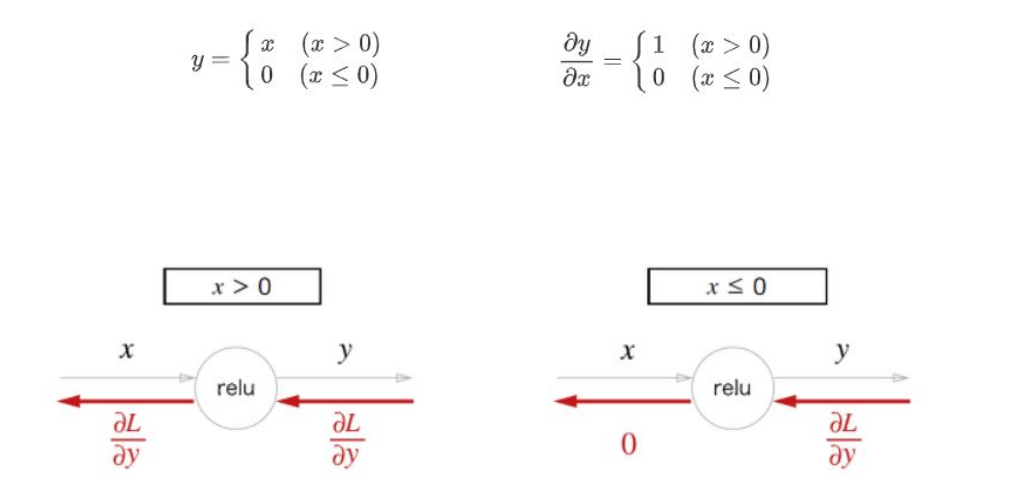

In [12]:
import numpy as np

In [ ]:
def relu(x):
    return np.maximum(0,x)

In [18]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [19]:
relu = Relu()

In [20]:
relu.forward(np.array([1,-2,3,-4]))

array([1, 0, 3, 0])

In [21]:
relu.mask

array([False,  True, False,  True])

In [23]:
relu.backward(np.array([1,2,-3,4]))

array([ 1,  0, -3,  0])

 Hard Sigmoid, ELU, PReLU, Swish, Softsign, Softplus, ThresholdReLU 등의 활성화 함수도 존재